In [1]:
import numpy as np
import pandas as pd
import graphviz 

from sklearn import tree
from dateutil import relativedelta

In [51]:
from utils import plotting
from forecast import rf, run

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(10, 4)})

In [166]:
space = np.linspace(10, 30, 700)
series = np.exp(-np.sin(space))*np.sin(space) + np.random.normal(0, 0.4, 700)


sample_ts = pd.DataFrame({"lm": series}, index=pd.date_range("1960-01-01", periods = len(space), freq="MS"))

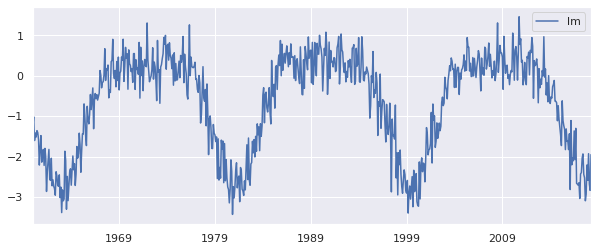

In [167]:
fig, ax = plt.subplots()
sample_ts.plot(ax = ax)

fig.show()

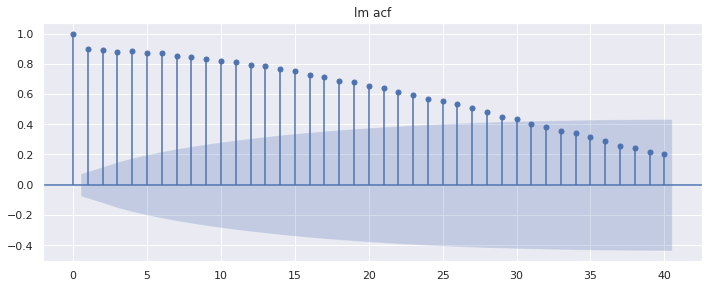

In [168]:
fig = plotting.plot_acf(sample_ts)

In [173]:
end_period = "2000-01-01"
train = sample_ts.loc[:end_period]
test = sample_ts.loc[end_period:]
lags = 12

In [174]:
X, y = rf.construct_rf_chunks(train, lags=lags)

In [175]:
reg = tree.DecisionTreeRegressor()

model = reg.fit(X, y)

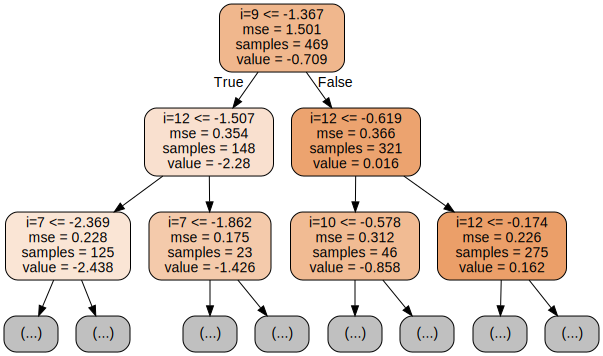

In [176]:
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=[f"i={i+1}" for i in range(X.shape[1])],  
                                filled=True, rounded=True, max_depth = 2)  
graph = graphviz.Source(dot_data)  
graph 

In [164]:
def forecaster(X: np.ndarray) -> np.ndarray: 

    X = X.reshape(1, -1)

    y_hat = {}

    pred = model.predict(X)[0]

    y_hat["lower_bound"] = np.nan
    y_hat["mean"] = pred
    y_hat["upper_bound"] = np.nan


    return y_hat

/mnt/c/Users/andre/tinbergen/env/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


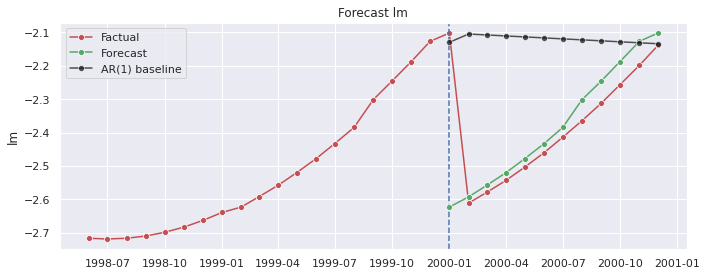

In [165]:
df_forecast = run.iterative_forecast(forecaster, train, lags = lags, periods = 12, against_baseline=True)
fig = plotting.plot_var(df_forecast, train, test, variables = sample_ts.columns, pre_periods = 20)

fig.show()